In [223]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [224]:
#loading the data from csv file
data = pd.read_csv("housing.csv")

In [225]:
#observing the data
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [226]:
#data exploration
data.info()

#in this dataset we have unequal number datasets i.e  no. of total bedrooms is not equal to total rooms and other datas
#to carry out the calculation we need to make the number of datasets equal so we can drop the null datasets so we can get only non-null value which eventually will be equal no. of datas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [227]:
#return data with only non-null value or in other words drop the data having null value
#"inplace=True permanently saves the edited data from the function dropna()"
data.dropna(inplace=True)



In [228]:
data.info()
#after dropping null values we get equal no. of data count of each class of data so that we can further continue our calculation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [229]:
#defining X and Y as known and unknown datasets simulteanously
from sklearn.model_selection import train_test_split

#X will be the dataframe without the target variable i.e median_house_value
X = data.drop(['median_house_value'], axis=1)

#Y is only going to be median house value(which we need to find)
y = data['median_house_value']

In [230]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [231]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [232]:
#splitting training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [233]:
#now we are going to join x_training_data and y_training_data so that we can observe some correlation between x and y.
train_data = X_train.join(y_train)

In [234]:
#here we can see the combined xy dataset
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18185,-122.04,37.38,38.0,2850.0,550.0,1518.0,514.0,4.2028,<1H OCEAN,273600.0
11482,-117.99,33.73,24.0,2104.0,421.0,1181.0,414.0,3.8365,<1H OCEAN,250900.0
19958,-119.32,36.21,29.0,1220.0,232.0,619.0,246.0,3.3125,INLAND,78300.0
12768,-121.43,38.61,40.0,1134.0,252.0,675.0,249.0,1.3696,INLAND,65200.0
19370,-123.00,38.33,8.0,3223.0,637.0,851.0,418.0,5.6445,NEAR OCEAN,364800.0
...,...,...,...,...,...,...,...,...,...,...
1952,-120.81,38.73,38.0,2005.0,385.0,882.0,353.0,2.5104,INLAND,120500.0
6898,-118.13,34.04,36.0,1938.0,364.0,1118.0,374.0,3.5833,<1H OCEAN,227300.0
8706,-118.34,33.83,34.0,1761.0,329.0,965.0,329.0,5.3990,<1H OCEAN,358500.0
16800,-122.42,37.67,42.0,2274.0,429.0,1255.0,397.0,5.1205,NEAR OCEAN,226300.0


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

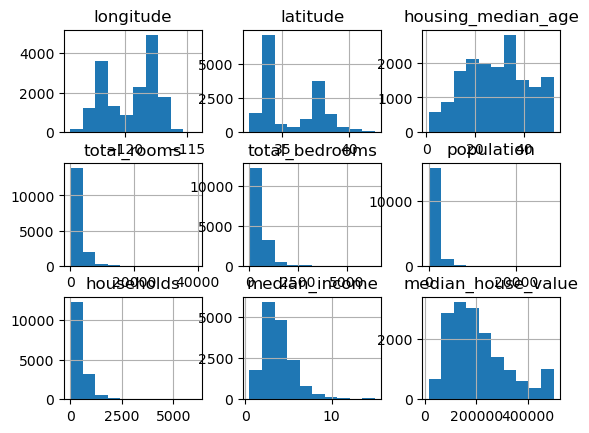

In [235]:
#let's see the histogram of the datasets
train_data.hist()

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

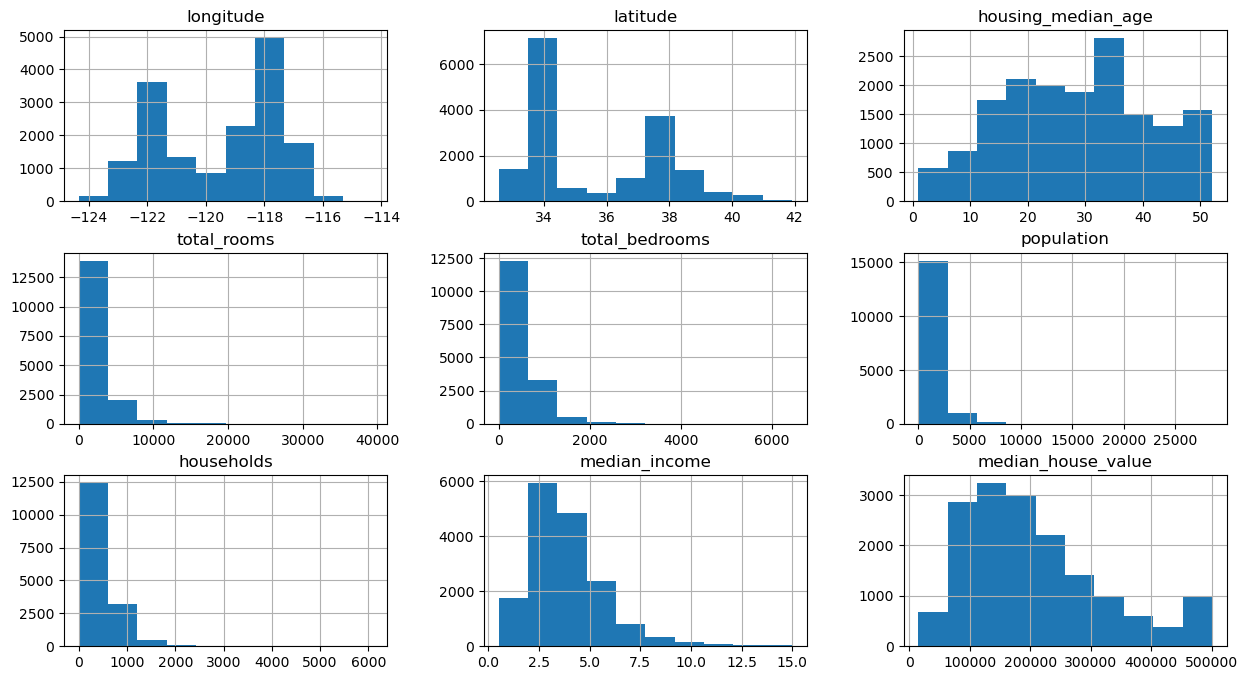

In [236]:
#here we can see the datasets and the target variable in graphical manner
train_data.hist(figsize=(15,8))

In [237]:
#correlation of datasets with the target variable
#correlation matrix
train_data.corr()

/tmp/ipykernel_4055/3846974952.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924735,-0.112044,0.047934,0.074034,0.102514,0.060774,-0.018133,-0.043825
latitude,-0.924735,1.000000,0.012829,-0.037301,-0.069959,-0.110507,-0.074487,-0.075911,-0.146557
housing_median_age,-0.112044,0.012829,1.000000,-0.360814,-0.319052,-0.301419,-0.301270,-0.119627,0.109622
total_rooms,0.047934,-0.037301,-0.360814,1.000000,0.930755,0.865801,0.919600,0.196848,0.131112
total_bedrooms,0.074034,-0.069959,-0.319052,0.930755,1.000000,0.884449,0.979214,-0.008176,0.049267
population,0.102514,-0.110507,-0.301419,0.865801,0.884449,1.000000,0.914289,0.006662,-0.024919
households,0.060774,-0.074487,-0.301270,0.919600,0.979214,0.914289,1.000000,0.013545,0.064820
median_income,-0.018133,-0.075911,-0.119627,0.196848,-0.008176,0.006662,0.013545,1.000000,0.684827
median_house_value,-0.043825,-0.146557,0.109622,0.131112,0.049267,-0.024919,0.064820,0.684827,1.000000


/tmp/ipykernel_4055/2824903505.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<AxesSubplot: >

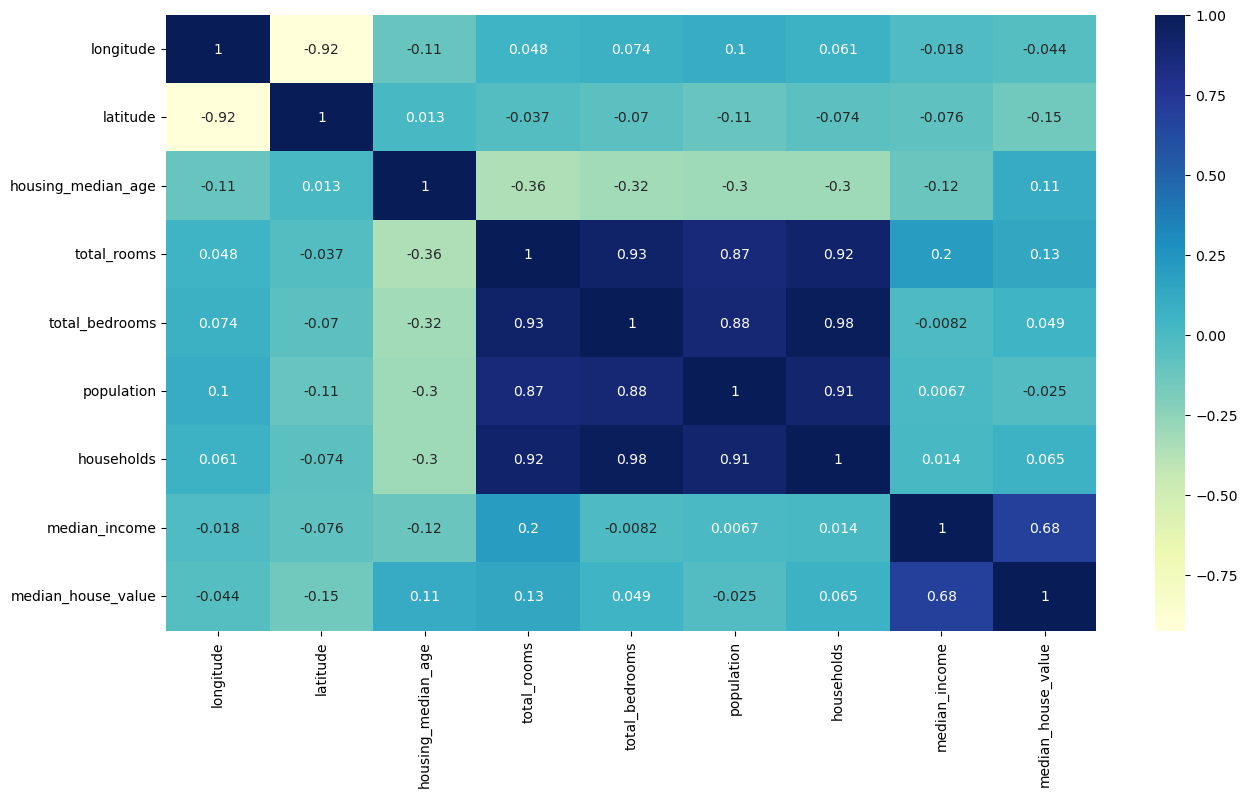

In [238]:
#plotting the above correlation matrix in heatmap
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
#where annot=annotation, cmap=colormap, YlGnBu=Yellow Green Blue
#we can see that the correlation of median_houe_value with other datasets which is the main goal of our data exploration
#for example longitude and latitude are negatively correlated, total_rooms is positively correlated with the median_house_value
#this is enough data exploration for this dataset for further calculations

In [239]:
#applying log distribution to the skewed datasets i.e total_rooms, total_bedrooms, population, households to normalize the data distribution
#By applying log on the x-axis, the skewness of datasets is converted to normal distribution of data.
#when the data is always positive it is most likely to end up in skewed distribution
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

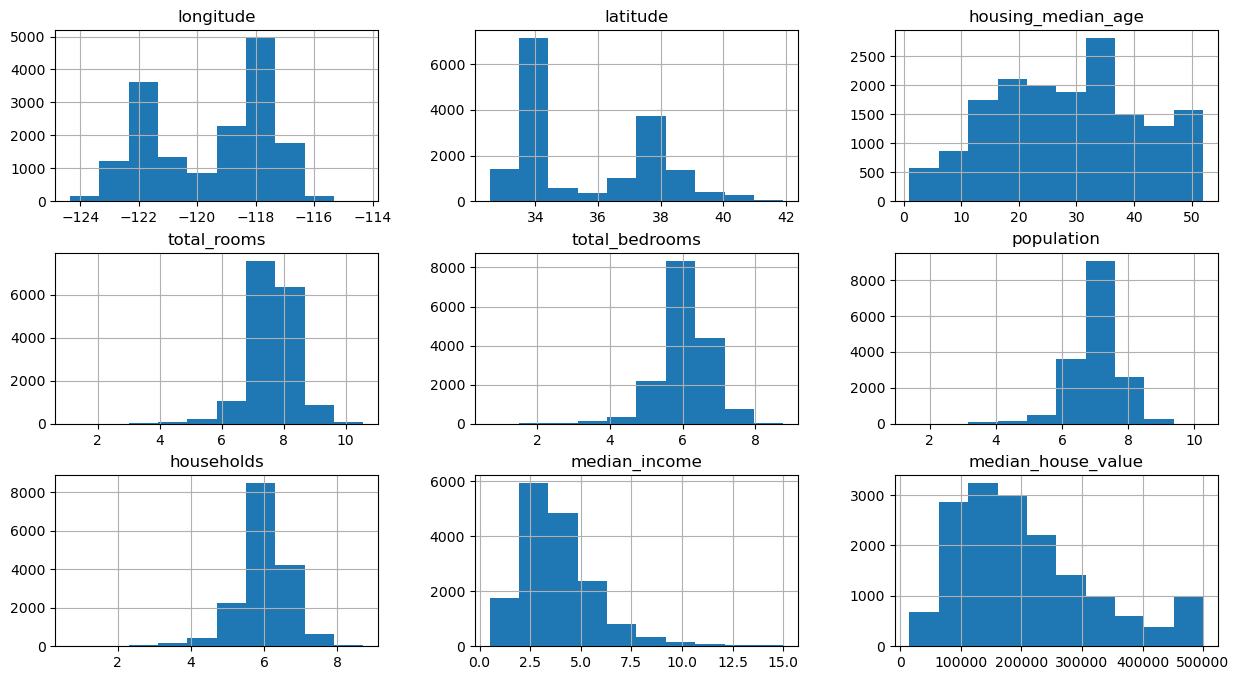

In [240]:
train_data.hist(figsize = (15,8))

In [241]:
#as we have discrete data values in ocean proximity, counting the discrete data of ocean proximity
train_data.ocean_proximity.value_counts()

<1H OCEAN     7224
INLAND        5197
NEAR OCEAN    2135
NEAR BAY      1786
ISLAND           4
Name: ocean_proximity, dtype: int64

In [242]:
#now we need to create the dummy rows to represent the <1H_ocean, INLAND, NEAR_OCEAN, NEAR_BAY, ISLAND, IN BINARY
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18185,1,0,0,0,0
11482,1,0,0,0,0
19958,0,1,0,0,0
12768,0,1,0,0,0
19370,0,0,0,0,1
...,...,...,...,...,...
1952,0,1,0,0,0
6898,1,0,0,0,0
8706,1,0,0,0,0
16800,0,0,0,0,1


In [243]:
#joining the dummy table with the original training data
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [244]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18185,-122.04,37.38,38.0,7.955425,6.311735,7.325808,6.244167,4.2028,273600.0,1,0,0,0,0
11482,-117.99,33.73,24.0,7.652071,6.045005,7.074963,6.028279,3.8365,250900.0,1,0,0,0,0
19958,-119.32,36.21,29.0,7.107425,5.451038,6.429719,5.509388,3.3125,78300.0,0,1,0,0,0
12768,-121.43,38.61,40.0,7.034388,5.533389,6.516193,5.521461,1.3696,65200.0,0,1,0,0,0
19370,-123.00,38.33,8.0,8.078378,6.458338,6.747587,6.037871,5.6445,364800.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,-120.81,38.73,38.0,7.603898,5.955837,6.783325,5.869297,2.5104,120500.0,0,1,0,0,0
6898,-118.13,34.04,36.0,7.569928,5.899897,7.020191,5.926926,3.5833,227300.0,1,0,0,0,0
8706,-118.34,33.83,34.0,7.474205,5.799093,6.873164,5.799093,5.3990,358500.0,1,0,0,0,0
16800,-122.42,37.67,42.0,7.729735,6.063785,7.135687,5.986452,5.1205,226300.0,0,0,0,0,1


<AxesSubplot: >

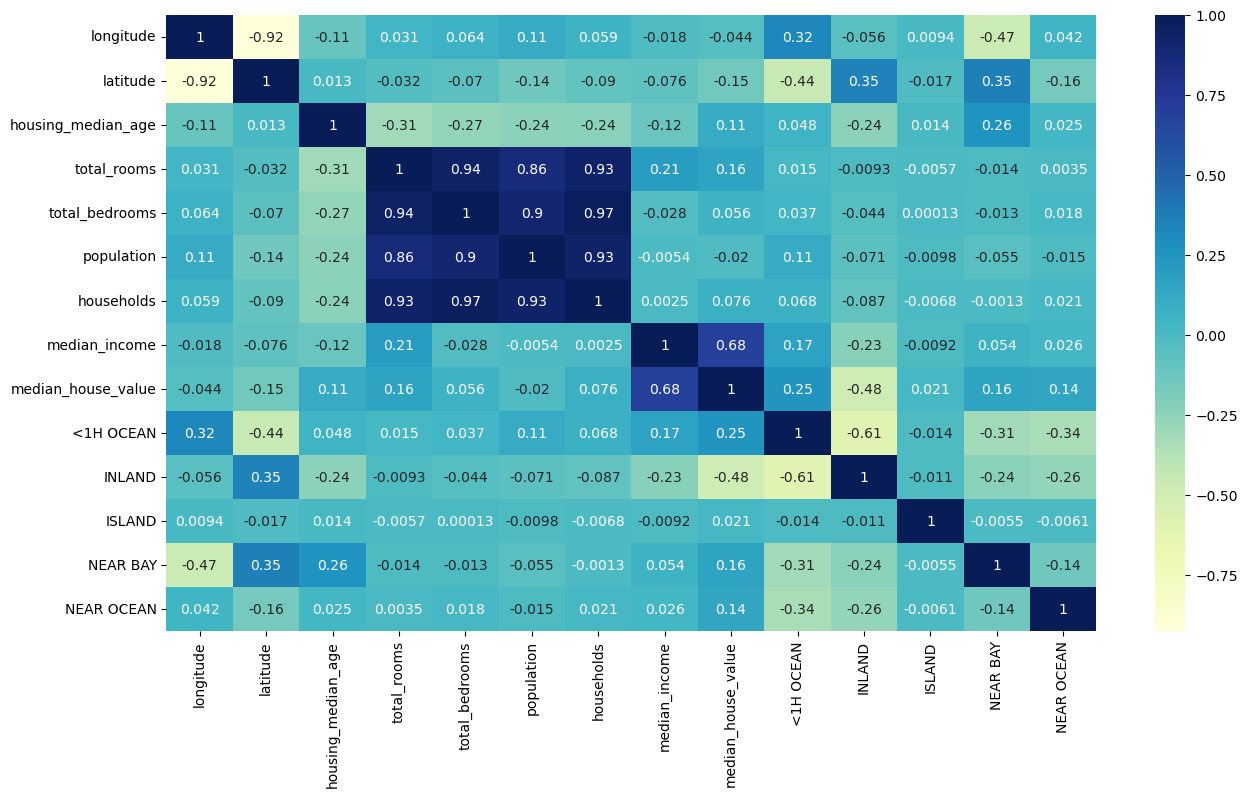

In [245]:
#again visualizing the data using heatmap
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

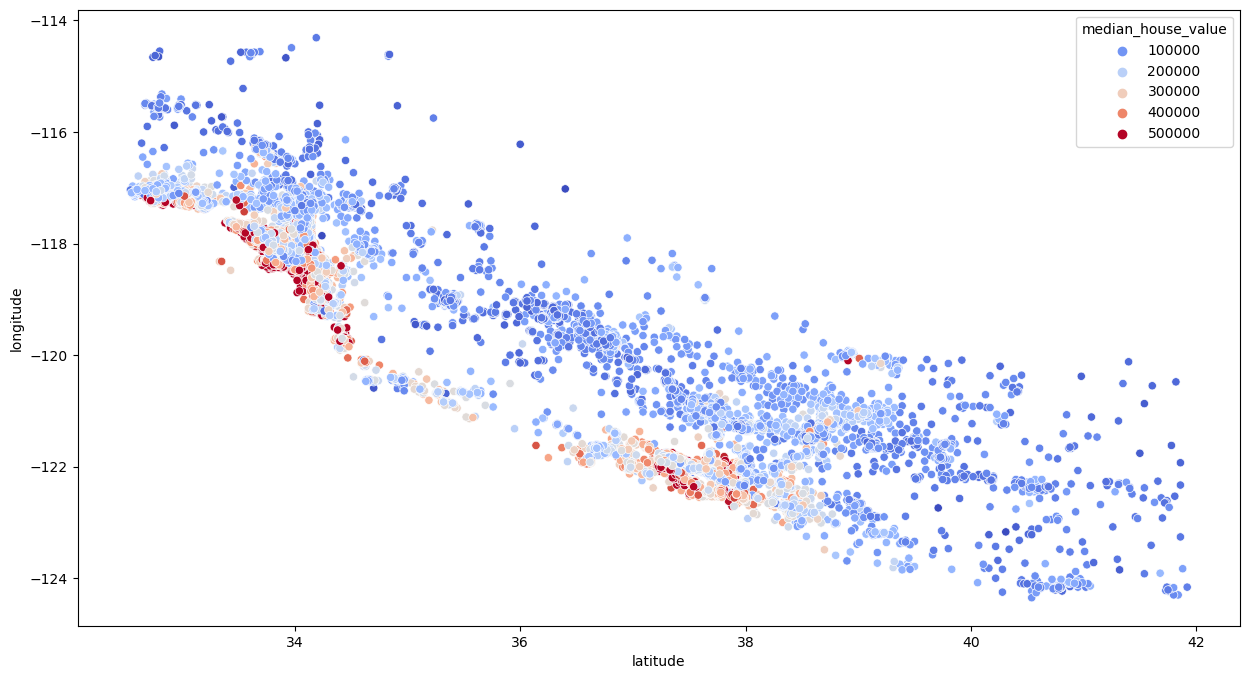

In [246]:
#drawing the map of the position of the houses according to the latitude and longitude 
#drawing scatterplot
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")
#the more red it gets, more expensive the house is and the more blue it gets more cheap the house is.

In [247]:
#feature engineering(modifying or adding features)
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']


<AxesSubplot: >

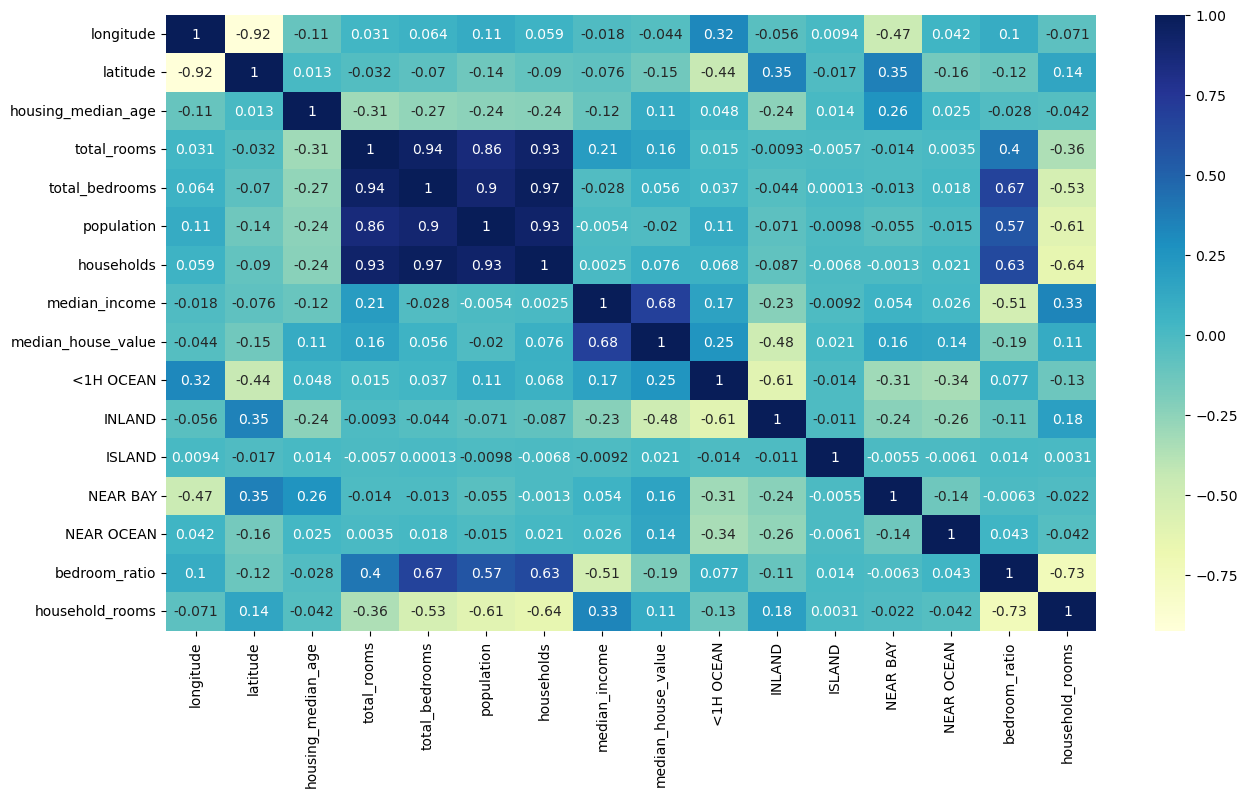

In [248]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [249]:
#LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [250]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['households'] = np.log(test_data['households']+1)
test_data['population'] = np.log(test_data['population']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [251]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [252]:
X_test_s = scaler.transform(X_test)

In [253]:
reg.score(X_test, y_test)

0.6719954837342887

In [255]:
#reg.score(X_test_s, y_test)

In [257]:
#mixing up different models 
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [258]:
forest.score(x_test, y_test)

-0.8905738727746471